## Notebook per l'estrazione delle misure, il calcolo di Anova e l'esecuzione del Tukey test.


In [1]:
#%matplotlib notebook
import numpy as np
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
import scipy.stats as stats

### Estrazione delle misure

Dopo aver eseguito l'indicizzazione e aver creato le quattro run richieste, si è eseguita la valutazione, usando trec_eval messo a disposizione da Terrier (v. 4.4), passando il file contenente i giudizi di rilevanza binaria. Per le diverse run ho salvato ogni output su un file di testo (che si possono trovare nella repository Github). La seguente cella esegue il parsing del file, passato come parametro, andando a cercare i valori di AP, il valore MAP (ovvero la media di tutti e 50 i valori di Average Precision per ogni run), il valore rprec e la Precision at 10.
Per identificare le run si utilizza un numero da 0 a 3, l'ordine segue quello richiesto nella consegna dell'homework:

- run 0: con Porter stemmer, rimozione stopword, BM25
- run 1: con Porter stemmer, rimozione stopword, TF_IDF 
- run 2: con Porter stemmer, BM25
- run 3: senza Porter stemmer e senza stopword, TF_IDF

In [2]:
#Funzione che parsa il file e rileva quindi per ogni run le diverse misure.

#RprecALL = []
#P10ALL = []
mapALL = []
def getMeasures(file, AP, p10, rprec, runID):
    f = open(file,'r')
    datasetLine = [x for x in f.readlines()]
    f.close()

    for line in datasetLine:
        split = line.split()
        if(split[1]!='all'):
            if(split[0]=='map'):
                AP.append(split[2])
            elif(split[0]=='P_10'):
                p10.append(split[2])
            elif(split[0]=='Rprec'):
                rprec.append(split[2])
        else: # cerco i valori con topic "all", stampo i valori di Precision@10 e Precision @RB, ma mi salvo i valori di MAP
            if (split[0]=='map'):
                print("Map della Run #"+ str(runID))
                print(split[2])
                mapALL.append(split[2])
            elif (split[0]=='P_10'):
                print("Precision at 10 della Run #"+ str(runID))
                print(split[2])
#                P10ALL.append(split[2])
            elif (split[0]=='Rprec'):
                print("Rprec della Run #" + str(runID))
                print(split[2])
#                RprecALL.append(split[2])
    print("-----------------------------------------------")

In [3]:
map_0 = []
p10_0 = []
rprec_0 = []

map_1 = []
p10_1 = []
rprec_1 = []

map_2 = [] 
p10_2 = []
rprec_2 = []

map_3 = []
p10_3 = []
rprec_3 = []

getMeasures('0_PS&SL_BM25.txt', map_0, p10_0, rprec_0, 0)
getMeasures('1_PS&SL_TF-IDf.txt', map_1, p10_1, rprec_1, 1)
getMeasures('2_PS_BM25.txt', map_2, p10_2, rprec_2, 2)
getMeasures('3_niente_TF-IDF.txt', map_3, p10_3, rprec_3, 3)

#print("Map: ", mapALL)
#print("-----------------------------------------------")

Map della Run #0
0.2126
Rprec della Run #0
0.2705
Precision at 10 della Run #0
0.4840
-----------------------------------------------
Map della Run #1
0.2120
Rprec della Run #1
0.2725
Precision at 10 della Run #1
0.4800
-----------------------------------------------
Map della Run #2
0.2108
Rprec della Run #2
0.2740
Precision at 10 della Run #2
0.4740
-----------------------------------------------
Map della Run #3
0.1875
Rprec della Run #3
0.2460
Precision at 10 della Run #3
0.4300
-----------------------------------------------


In [4]:
#matrice valori di AP per ogni run (una per colonna)
#M = np.vstack((map_0, map_1, map_2, map_3))
#print(M.T)

### Plot delle misure

Nelle seguenti celle saranno plottati i risultati ottenuti:
- valore di MAP per ogni run;
- valori di AP (Average Precision), P10 (Precision al cutoff 10) e rPrec (precision alla Recall Base) al variare del topic, per ogni run; vengono quindi plottati quattro grafici diversi, ho scelto un colore diverso per ogni misura, per maggiore chiarezza

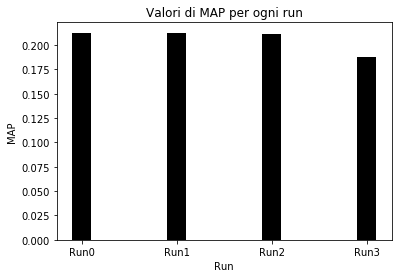

In [5]:
#plot dei 4 valori di MAP (map_all) 
mapALL = list(map(float, mapALL))

#plt.plot([0,1,2,3],mapALL, marker='o')
plt.bar(["Run0","Run1", "Run2","Run3"], mapALL, width=0.2, color='black')
plt.title("Valori di MAP per ogni run")
plt.xticks(range(0, 4))
plt.xlabel("Run")
plt.ylabel("MAP")
plt.savefig('Plot/MAPhist.png', format='png', dpi=1000)
#plt.savefig('Plot/MAPhist500.png', format='png', dpi=500)
plt.show()

Vediamo come l'ultima run sia quella che mediamente ottiene risultati peggiore: ha una precisione del circa 18% contro un 21% delle altre run.

In [6]:
#funzione per plot dei diversi valori di una misura (Average Precision (AP), P10 e Rprec nel nostro caso)
#per una singola run, per ogni topic

def plotAP(arrayM, clr, runID, label):
    #print(len(map_0))
    x = np.empty(50)
    b = np.arange(351, 401, 1) #da 351 a 400 con passo 1
    ind = np.arange(len(x))
    np.put(x, ind, b)
    #print(x)
    #print(arrayM)
    arrayM = list(map(float, arrayM))
    plt.rcParams["figure.figsize"]=[12.0,6.0]
    plt.title(str(label) + " per la Run"+ str(runID))
#    plt.plot(x,arrayMAP, marker='o', color=clr)
    plt.bar(x, arrayM, width=0.6, color=clr)
    plt.xticks(range(351, 401, 1), rotation=90)
    plt.xlabel("Topics")
    plt.ylabel(label)
    plt.savefig('Plot/' + str(label) + '_run'+ str(runID) + '.png', format='png', dpi=500)
    plt.show()

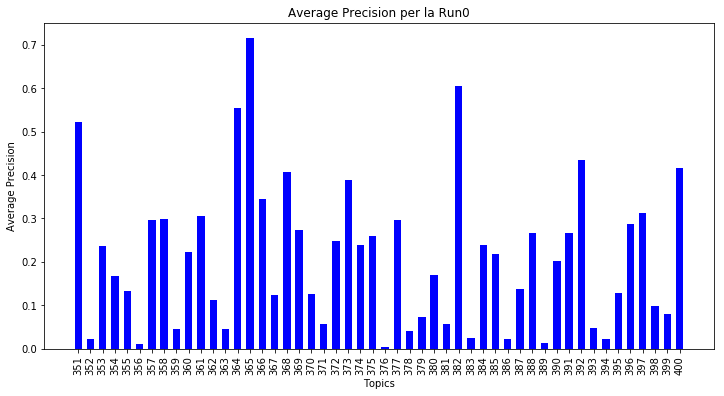

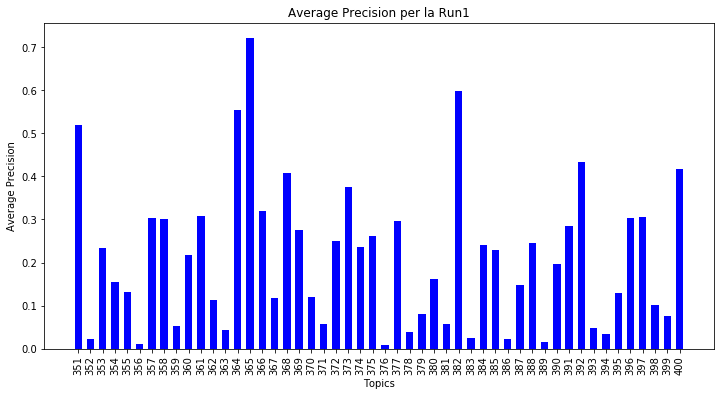

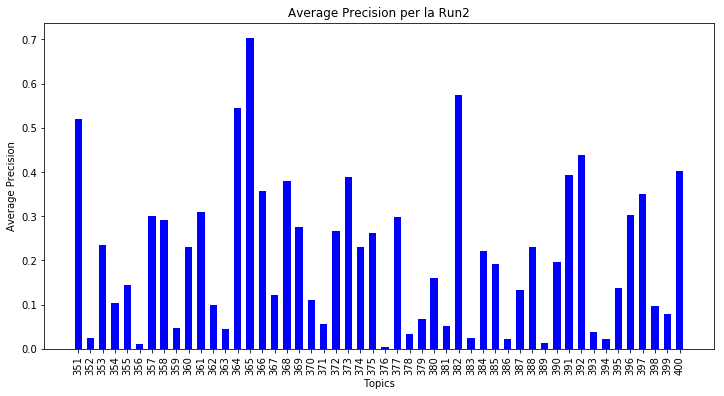

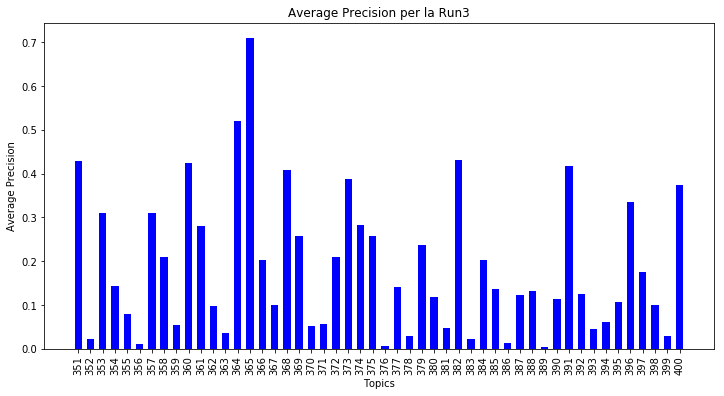

In [7]:
plotAP(map_0, "b", 0,"Average Precision")
plotAP(map_1, "b", 1,"Average Precision")
plotAP(map_2, "b", 2, "Average Precision")
plotAP(map_3, "b", 3, "Average Precision")

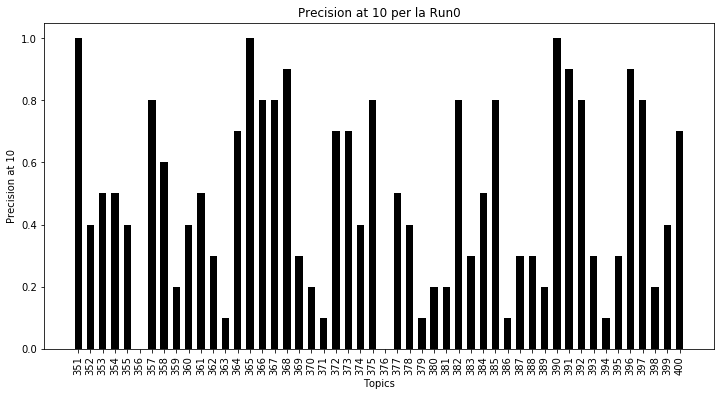

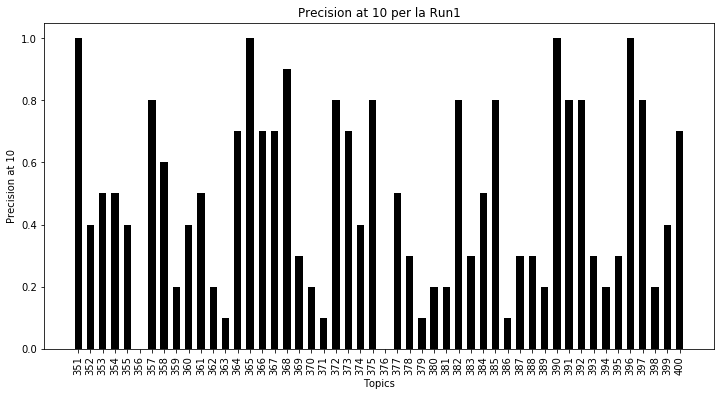

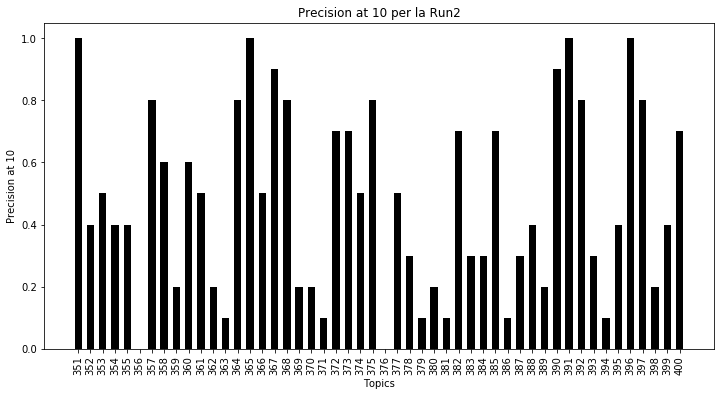

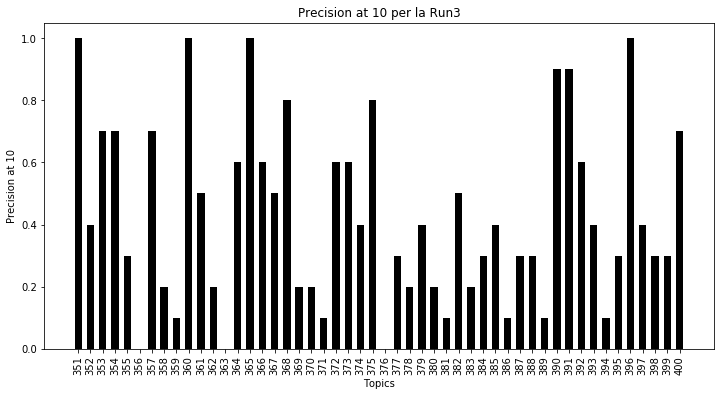

In [8]:
plotAP(p10_0, "black", 0, "Precision at 10")
plotAP(p10_1, "black", 1,"Precision at 10")
plotAP(p10_2, "black", 2,"Precision at 10")
plotAP(p10_3, "black", 3,"Precision at 10")

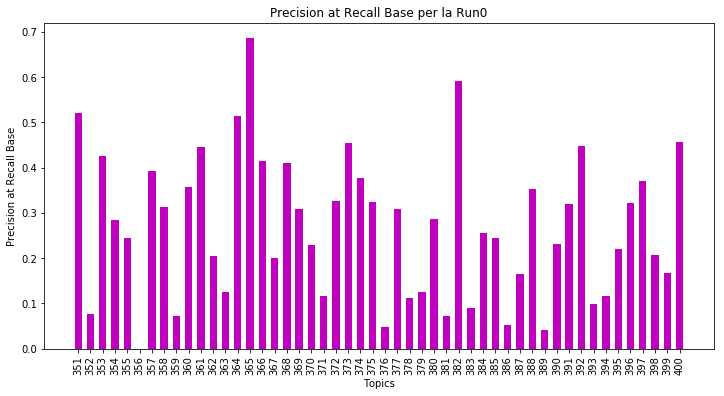

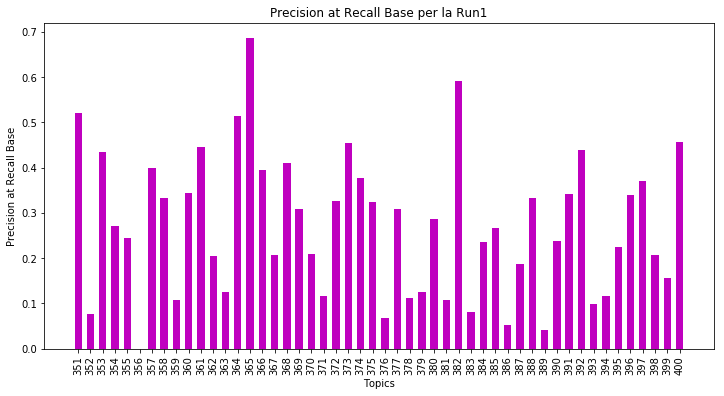

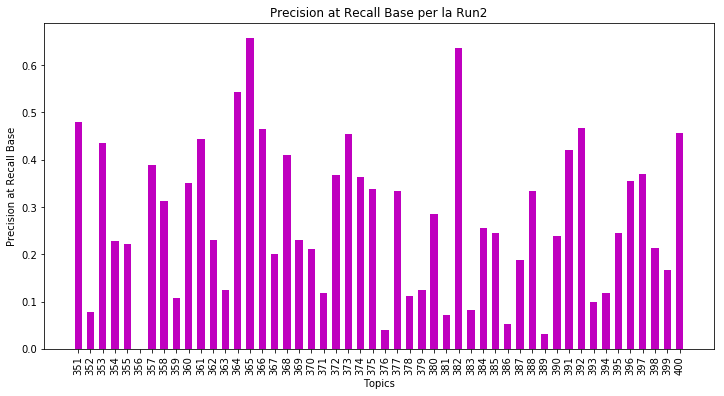

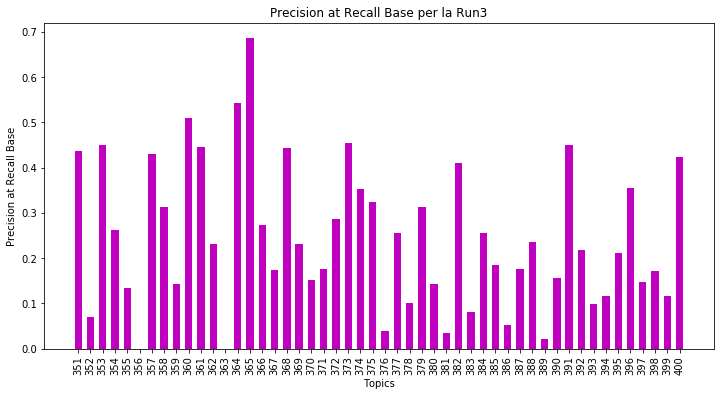

In [9]:
plotAP(rprec_0, "m", 0, "Precision at Recall Base")
plotAP(rprec_1, "m", 1, "Precision at Recall Base")
plotAP(rprec_2, "m", 2, "Precision at Recall Base")
plotAP(rprec_3, "m", 3, "Precision at Recall Base")

**Commenti sui plot**

Come atteso, dai grafici notiamo innanzitutto come i valori di precisione per i primi 10 documenti rilevanti siano genericamente più alti: alcuni topic raggiungono valori di precisione 1, mai raggiunta se considero tutti i documenti o con il cutoff alla recall base (in questi casi raggiungiamo valori al massimo di 0.7).

Notiamo inoltre che l'ultima run ottiene sempre risultati più scarsi rispetto alle tre precedenti.

### ANOVA 1-WAY E TUKEY HSD TEST

Questi test vengono eseguiti per studiare eventuali differenze delle distribuzioni dei dati, che la media non è detto evidenzi. Viene scelto un valore di confidenza $\alpha$ pari a 0.05 e la null hypothesis nel nostro caso afferma che le differenze tra alcune delle medie non sono statisticamente significative (sono quindi statisticamente uguali).

I test sono stati condotti dapprima con la misura Average Precision, poi si è deciso di eseguirli anche con le altre due misure per vedere se i risultati ottenuti con la prima misura venivano confermati o meno.

Prima di condurre i test, ho anche plottato per ogni misura il boxplot, utile per visualizzare le distribuzioni di dati, in particolare per vedere se sono sbilanciati rispetto la mediana (la linea orizzontale all'interno del boxplot) e se sono presenti outlier (eventuali cerchi sul grafico). La seguente cella definisce una funzione a tale scopo.

In [10]:
def boxPlot(m0, m1, m2, m3, measureName):
    m0 = list(map(float, m0))
    m1 = list(map(float, m1))
    m2 = list(map(float, m2))
    m3 = list(map(float, m3))
    data_to_plot = [m0, m1, m2, m3]
    fig = plt.figure(1, figsize=(9, 6))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_to_plot)
    ax.set_xticklabels(['Run0', 'Run1', 'Run2', 'Run3'])
    ax.set_xlabel("Runs")
    ax.set_ylabel(measureName)
    fig.savefig('plot/boxPlot_' + str(measureName) + '.png', bbox_inches='tight', format='png', dpi=1000)

**Average Precision**

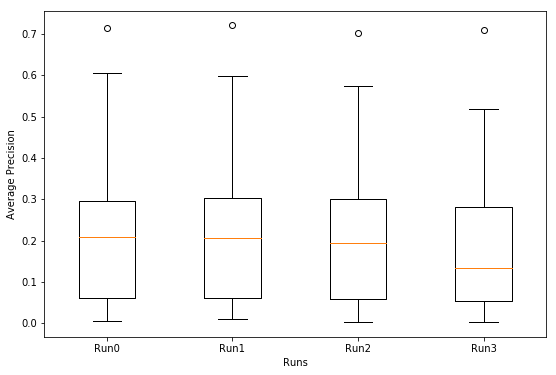

In [11]:
boxPlot(map_0, map_1, map_2, map_3, "Average Precision")

La seguente cella calcola la funzione **ANOVA 1-way**.

Se il p_value (area sotto la curva della distribuzione) restituito è minore del parametro $\alpha$ allora possiamo rigettare la null hypothesis, altrimenti rifiutiamo di rigettarla.

In [12]:
#compute ANOVA 1 way
alpha=0.05

f_stat, p_val = stats.f_oneway(map_0, map_1, map_2, map_3)

print("f_stat (F-value of the test) = ",f_stat)
print("p_value = ",p_val)
#When we say p value, we are referring to the area under the curve of a distribution.
if(p_val < alpha):
    print("\nRigetto la null hypothesis")
else:
    print("\nFallisco di rigettare la null hypothesis")

f_stat (F-value of the test) =  0.269822428311433
p_value =  0.8471081879709074

Fallisco di rigettare la null hypothesis


Il **test di Tukey HSD** è un metodo comune per condurre un'analisi dopo il calcolo dell'Anova 1-way. Il multicomparison test compara tutte le possibili coppie di run per fare un confronto (le run sono indipendenti le une dalle altre) e mettere maggiormente in evidenza le differenze. Il pairwise test crea intervalli di confidenza: se non vi sono sovrapposizioni tra gli intervalli di confidenza della run con prestazioni migliori e un'altra run, quest'ultima non appartiene al top group.

Nella seguente cella viene quindi definita la funzione per eseguire il test di Tukey e plottare i risultati.

In [13]:
def TukeyTest(m0, m1, m2, m3, measureName): #passo i diversi array con le diverse misure
    runs=[]
    #prova=[]
    for i in range (4):
        for j in range (50):
            runs.append("run"+str(i))
    #print(runs)
    arrayM = np.concatenate([m0, m1, m2, m3])
    mc = MultiComparison(arrayM.astype('float'), runs)
    #result = mc.tukeyhsd()
    result=mc.tukeyhsd(alpha)
    #print(result)
    #print(mc.groupsunique)
    #print("reject: ", result.reject)
    print("meandiffs:", result.meandiffs)
    print("confint: ",result.confint)
    #print("std_pairs: ",result.std_pairs)
    #print("q_crit: ",result.q_crit)
    print("\nTabella riassuntiva:")
    print(result.summary())
#*************************************
#*************************************    
    # Plot group confidence intervals: Multiple Comparison
    result.plot_simultaneous(xlabel= measureName,ylabel="Runs").savefig('plot/TukeyTest_' + str(measureName) + '.png', format='png', dpi=1000)
    #print(result.meandiffs)
    print("halfwidths (margine d'errore): ",result.halfwidths)
    #print(result.summary())

meandiffs: [-0.000532 -0.001754 -0.025094 -0.001222 -0.024562 -0.02334 ]
confint:  [[-0.0865202  0.0854562]
 [-0.0877422  0.0842342]
 [-0.1110822  0.0608942]
 [-0.0872102  0.0847662]
 [-0.1105502  0.0614262]
 [-0.1093282  0.0626482]]

Tabella riassuntiva:
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 run0   run1  -0.0005  -0.0865 0.0855 False 
 run0   run2  -0.0018  -0.0877 0.0842 False 
 run0   run3  -0.0251  -0.1111 0.0609 False 
 run1   run2  -0.0012  -0.0872 0.0848 False 
 run1   run3  -0.0246  -0.1106 0.0614 False 
 run2   run3  -0.0233  -0.1093 0.0626 False 
--------------------------------------------
halfwidths (margine d'errore):  [0.0429941 0.0429941 0.0429941 0.0429941]


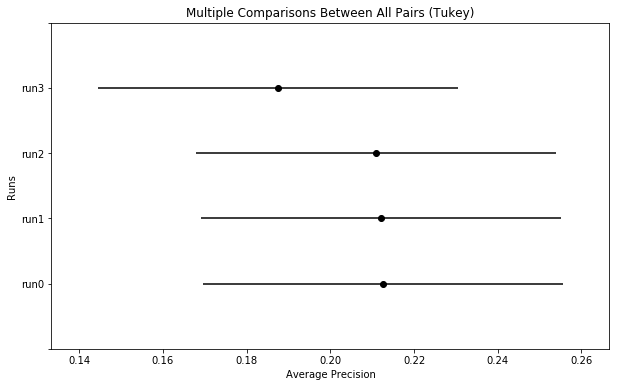

In [14]:
TukeyTest(map_0, map_1, map_2, map_3, "Average Precision")

**Precision at 10**

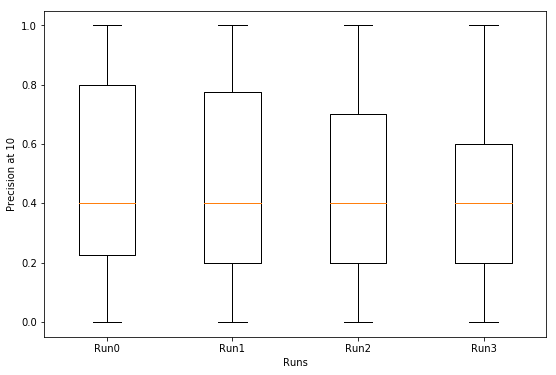

In [15]:
boxPlot(p10_0, p10_1, p10_2, p10_3, "Precision at 10")

In [16]:
##Anova 1-way con Precision at 10

f_stat, p_val = stats.f_oneway(p10_0, p10_1, p10_2, p10_3)

print("f_stat (F-value of the test) = ", f_stat)
print("pvalue = ",p_val)
#When we say p value, we are referring to the area under the curve of a distribution.
if(p_val < alpha):
    print("\nRigetto la null hypothesis")
else:
    print("\nFallisco di rigettare la null hypothesis")

f_stat (F-value of the test) =  0.35778395335621926
pvalue =  0.7835600894153874

Fallisco di rigettare la null hypothesis


meandiffs: [-0.004 -0.01  -0.054 -0.006 -0.05  -0.044]
confint:  [[-0.15720954  0.14920954]
 [-0.16320954  0.14320954]
 [-0.20720954  0.09920954]
 [-0.15920954  0.14720954]
 [-0.20320954  0.10320954]
 [-0.19720954  0.10920954]]

Tabella riassuntiva:
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 run0   run1   -0.004  -0.1572 0.1492 False 
 run0   run2   -0.01   -0.1632 0.1432 False 
 run0   run3   -0.054  -0.2072 0.0992 False 
 run1   run2   -0.006  -0.1592 0.1472 False 
 run1   run3   -0.05   -0.2032 0.1032 False 
 run2   run3   -0.044  -0.1972 0.1092 False 
--------------------------------------------
halfwidths (margine d'errore):  [0.07660477 0.07660477 0.07660477 0.07660477]


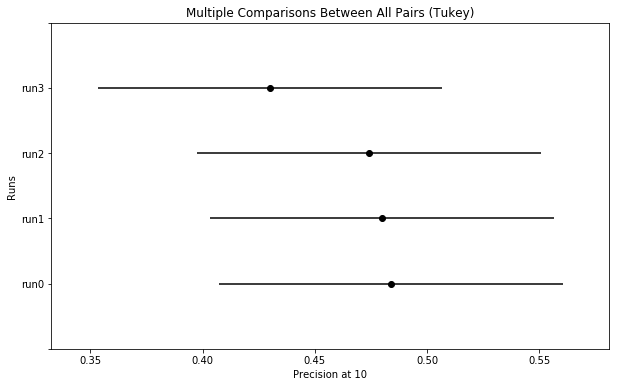

In [17]:
TukeyTest(p10_0, p10_1, p10_2, p10_3, "Precision at 10")

**Precision at Recall Base**

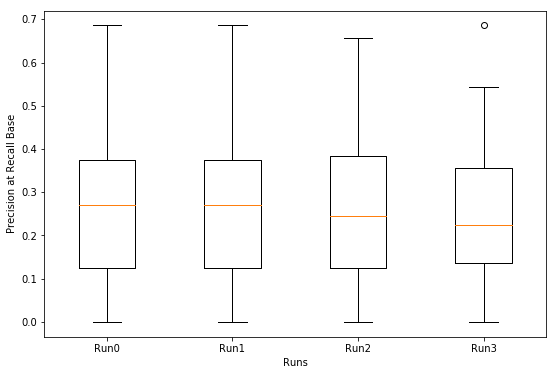

In [18]:
boxPlot(rprec_0, rprec_1, rprec_2, rprec_3, "Precision at Recall Base")

In [19]:
#Anova con Precision at Recall Base

f_stat, p_val = stats.f_oneway(rprec_0, rprec_1, rprec_2, rprec_3)

print("f_stat (F-value of the test) = ",f_stat)
print("pvalue = ",p_val)
#When we say p value, we are referring to the area under the curve of a distribution.
if(p_val < alpha):
    print("\nRigetto la null hypothesis")
else:
    print("\nFallisco di rigettare la null hypothesis")

f_stat (F-value of the test) =  0.35084941805375086
pvalue =  0.7885747493027742

Fallisco di rigettare la null hypothesis


meandiffs: [ 0.001928  0.00343  -0.024574  0.001502 -0.026502 -0.028004]
confint:  [[-0.08007794  0.08393394]
 [-0.07857594  0.08543594]
 [-0.10657994  0.05743194]
 [-0.08050394  0.08350794]
 [-0.10850794  0.05550394]
 [-0.11000994  0.05400194]]

Tabella riassuntiva:
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 run0   run1   0.0019  -0.0801 0.0839 False 
 run0   run2   0.0034  -0.0786 0.0854 False 
 run0   run3  -0.0246  -0.1066 0.0574 False 
 run1   run2   0.0015  -0.0805 0.0835 False 
 run1   run3  -0.0265  -0.1085 0.0555 False 
 run2   run3   -0.028   -0.11  0.054  False 
--------------------------------------------
halfwidths (margine d'errore):  [0.04100297 0.04100297 0.04100297 0.04100297]


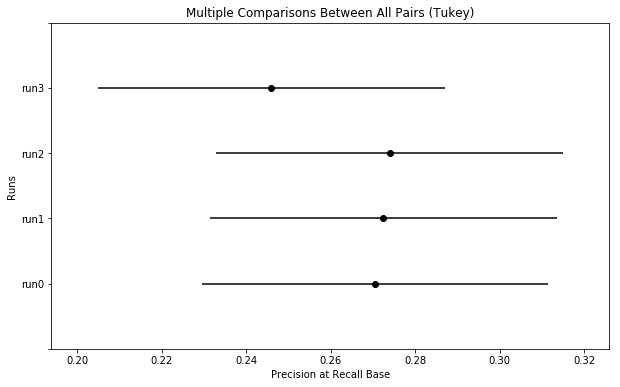

In [20]:
TukeyTest(rprec_0, rprec_1, rprec_2, rprec_3, "Precision at Recall Base")